# Women's Clothing E-Commerce Reviews

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

from xgboost import XGBClassifier

from nltk.corpus import stopwords

C:\Users\Vinay\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Vinay\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
data = pd.read_csv('C:/Users/Vinay/Documents/Womens_Clothing_E_Commerce_Reviews.csv', 
                   index_col=0)

In [3]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
data.columns = ['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating', \
                'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name', \
               'Department_Name', 'Class_Name']

## Data Description

In [5]:
data.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'],
      dtype='object')

In [6]:
data.shape

(23486, 10)

In [7]:
data.dtypes

Clothing_ID                 int64
Age                         int64
Title                      object
Review_Text                object
Rating                      int64
Recommended_IND             int64
Positive_Feedback_Count     int64
Division_Name              object
Department_Name            object
Class_Name                 object
dtype: object

In [8]:
data.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
data.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing_ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review_Text                22641 non-null object
Rating                     23486 non-null int64
Recommended_IND            23486 non-null int64
Positive_Feedback_Count    23486 non-null int64
Division_Name              23472 non-null object
Department_Name            23472 non-null object
Class_Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### There are **10 columns** and **23486 rows** in the dataset.

This dataset includes 23486 rows and 10 feature variables.
Each row corresponds to a customer review, and includes the variables below

**Details of the columns:**
    1. Clothing ID: Each row is identified with a unique ID.
    2. Age: Age of the reviewer
    3. Title: Title of the review
    4. Review Text: Description of the review
    5. Rating: Rating given by the reviewer, numbered from 1-5
    6. Recommended IND: Whether the product is recommended or not by the reviewer.
                        If Yes - 1
                        If No - 0
    7. Positive Feedback Count: Number of times, the user has given positive feedback.
    8. Division Name: Name of the division, in which the item was classified into.
    9. Department Name: Name of the department in the division.
    10. Class Name: Name of the class in the department.

### Missing values

In [11]:
for i in data.columns[data.isna().any()].tolist():
    print(i, 'has', data[data[i].isna()==True].shape[0], 'Null Values')

Title has 3810 Null Values
Review_Text has 845 Null Values
Division_Name has 14 Null Values
Department_Name has 14 Null Values
Class_Name has 14 Null Values


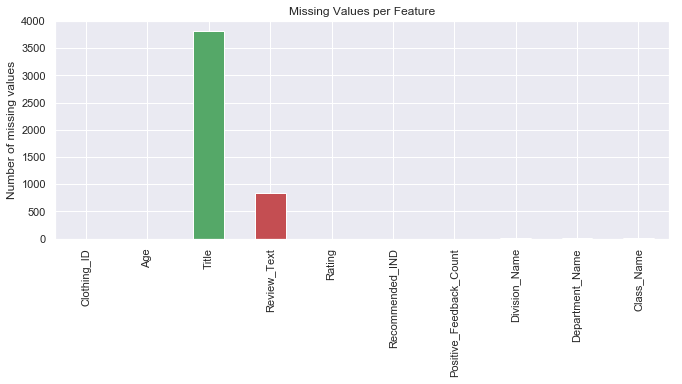

In [12]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(data).sum().plot(kind='bar', color = ['g', 'r'])
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');

### Descriptive analysis and Exploratory Data analysis

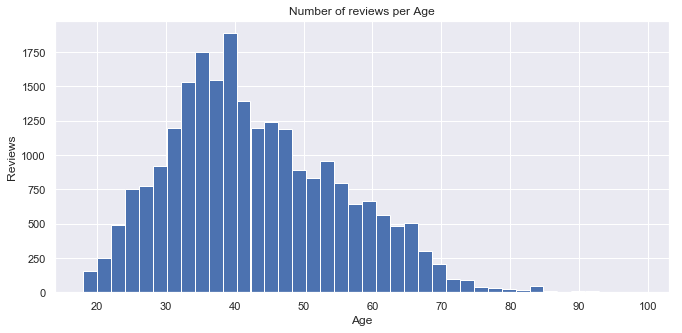

In [13]:
# Lets see the age distribution first
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(data.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

By the above graph we can conclude that, the distribution is normal
and the age group 25 to 45 is the most revieving age group. 



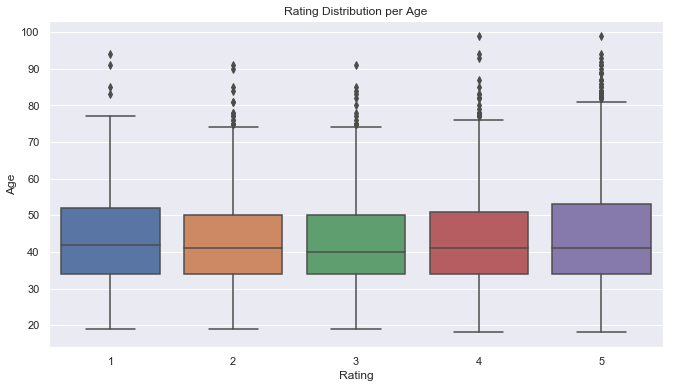

In [14]:
sns.set(rc={'figure.figsize':(11,6)})
sns.boxplot(x = 'Rating', y = 'Age', data = data)
plt.title('Rating Distribution per Age');

Here, the upper quartile, lower quartile and the median of all age groups has not showing much difference.
Hence,we can conclude the age is not a carrying much difference in reviewing the cloths.

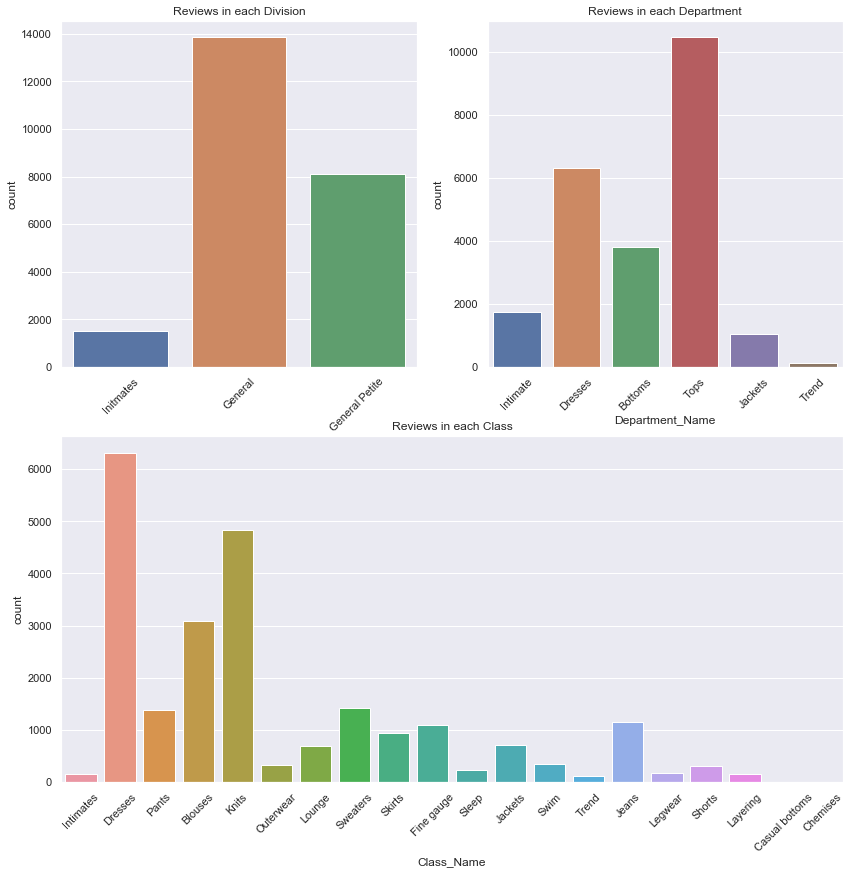

In [15]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(data['Division_Name'])
ax1 = plt.title("Reviews in each Division")

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(data['Department_Name'])
ax2 = plt.title("Reviews in each Department")


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(data['Class_Name'])
ax3 = plt.title("Reviews in each Class")

In [16]:
recommended = data[data['Recommended_IND']==1]
not_recommended = data[data['Recommended_IND']==0]

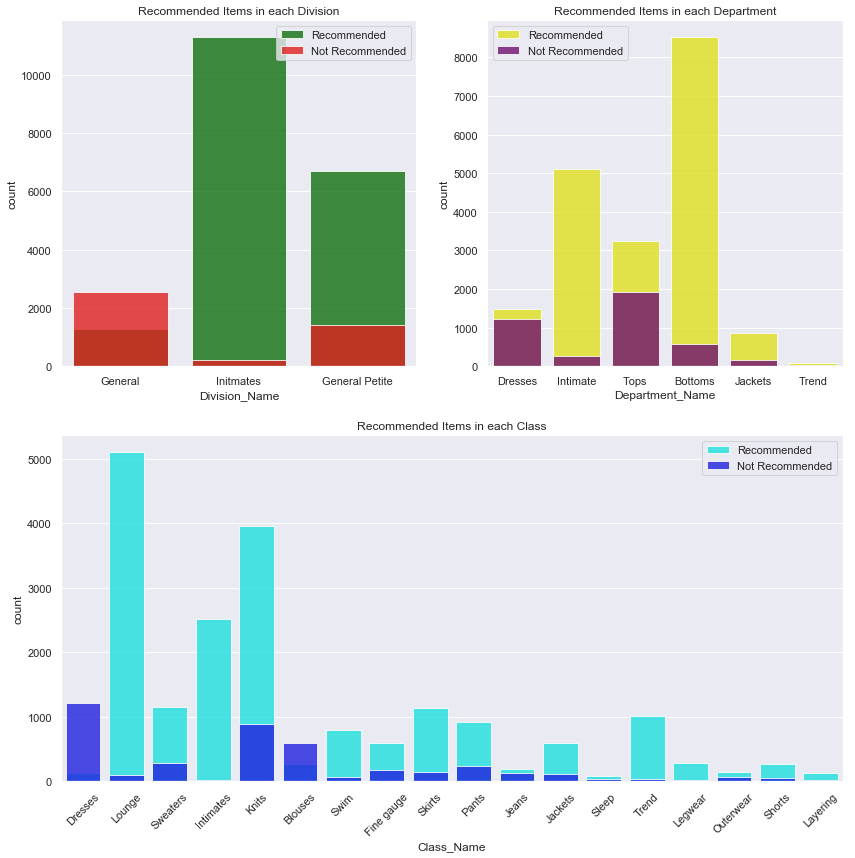

In [17]:
fig = plt.figure(figsize=(14, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(recommended['Division_Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Division_Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(recommended['Department_Name'], color="yellow", alpha = 0.8, label = "Recommended")
ax2 = sns.countplot(not_recommended['Department_Name'], color="purple", alpha = 0.8, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended['Class_Name'], color="cyan", alpha = 0.8, label = "Recommended")
ax3 = sns.countplot(not_recommended['Class_Name'], color="blue", alpha = 0.8, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

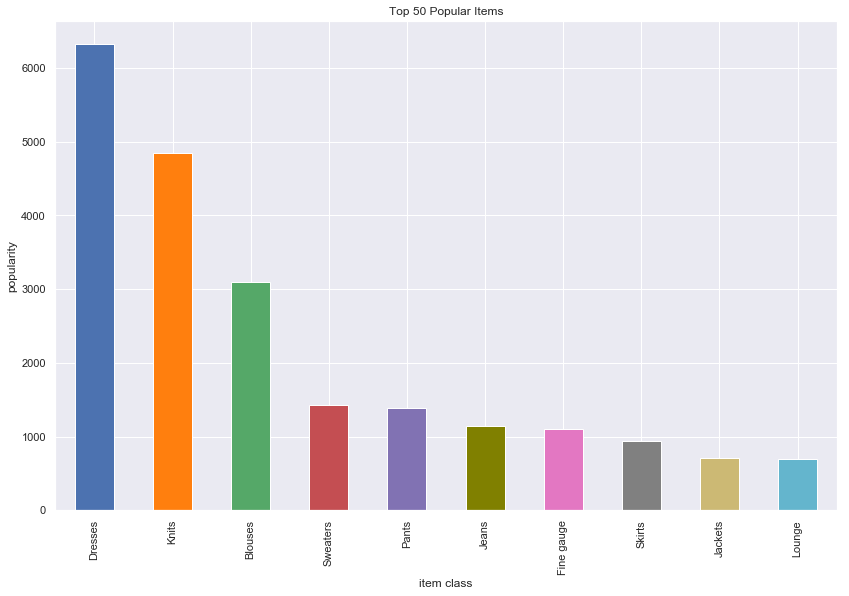

In [18]:
fig = plt.figure(figsize=(14, 9))
plt.xticks(rotation=45)
plt.xlabel('item class')
plt.ylabel('popularity')
plt.title("Top 50 Popular Items")
data['Class_Name'].value_counts()[:10].plot(kind='bar', color = ['b', 'tab:orange', 'g', 'r', 'm', 'olive', 'tab:pink'
                                                                , 'grey', 'y', 'c']);


In [19]:
data['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [20]:
data["Clothing_ID"].value_counts().head(10)

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
Name: Clothing_ID, dtype: int64

Inferences:

    1.Age is not showing much difference in reviewing.
    
    2.The distribution is normal.
    
    3.General division contributes more reviews.
    
    4.Tops has much  following in the current trend.
    
    5.Dresses and knits class tops the list.
    
    6.Dresses class need urgent care.
    
    7.Longue class is most recomended.

In [21]:
sns.set(rc={"font.style":"normal",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(12.0,7.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15}) 

### Convert the ratings into 2 classes

In [22]:
data.index = pd.Series(list(range(data.shape[0])))

In [23]:
def polarity (row):
  if row['Rating'] > 3:
    return 'Good'
  if row['Rating'] <= 3:
    return 'Bad'
 
data['Class'] = data.apply(lambda row: polarity(row), axis=1)


In [24]:
data["Class"].head(10)

0    Good
1    Good
2     Bad
3    Good
4    Good
5     Bad
6    Good
7    Good
8    Good
9    Good
Name: Class, dtype: object

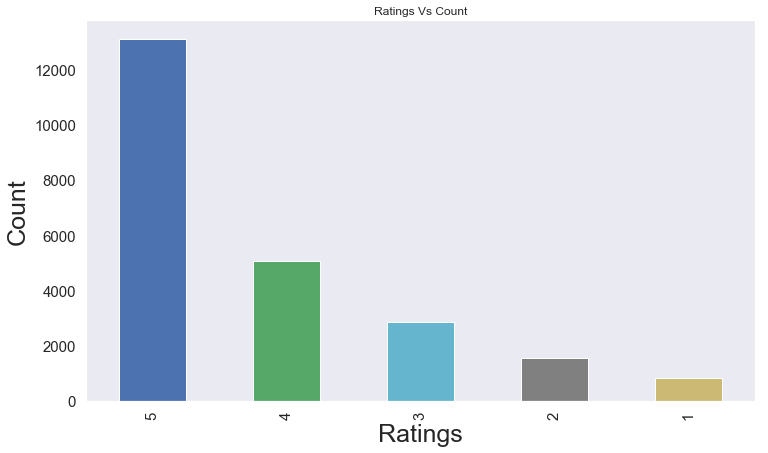

In [25]:
plot1 = data['Rating'].value_counts().plot(kind = 'bar', color = ['b', 'g', 'c', 'grey', 'y'])
plot1.set(title = 'Ratings Vs Count', xlabel = 'Ratings', ylabel = 'Count')
plt.show()

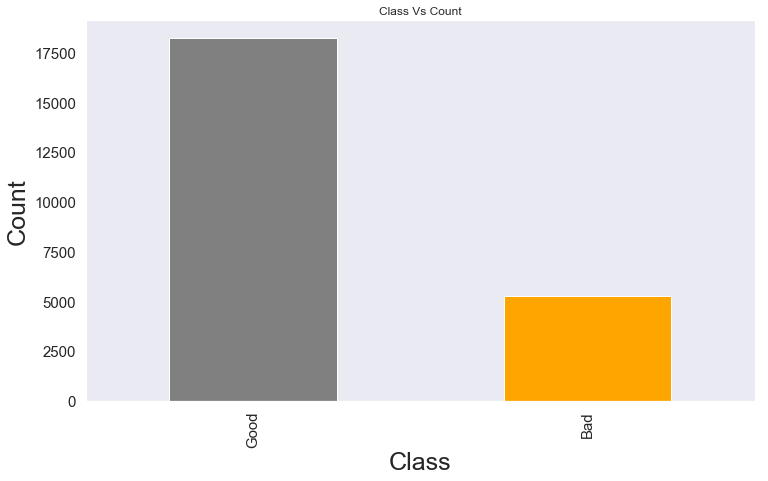

In [26]:
plot2 = data['Class'].value_counts().plot(kind = 'bar', color = ['grey', 'orange'])
plot2.set(title = 'Class Vs Count', xlabel = 'Class', ylabel = 'Count')
plt.show()

### Top 10 most reviewed Clothing IDs.

In [27]:
data.Clothing_ID.value_counts().head(10)

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
Name: Clothing_ID, dtype: int64

In [28]:
data[data.Class == 'Good'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'Count of Good Reviews':'count'}).sort_values(by = 'Count of Good Reviews', ascending = False).head(10)

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Count of Good Reviews
Clothing_ID,
1078,796
862,627
1094,584
1081,471
872,459
829,406
1110,377
895,323
868,295


In [29]:
data[data.Class == 'Bad'].groupby(['Clothing_ID'])['Clothing_ID'].agg({'Count of Bad Reviews':'count'}).sort_values(by = 'Count of Bad Reviews', ascending = False).head(10)

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Count of Bad Reviews
Clothing_ID,
1078,228
862,179
1094,172
868,135
829,121
1081,111
1110,103
1095,88
872,86


### Converting dataset based on Age

In [30]:
data.Age.agg({'max', 'min'})

max    99
min    18
Name: Age, dtype: int64

In [31]:
Age_List = pd.DataFrame(columns = ['Age_Group', 'Total_Reviews', 'Good', 'Bad'])
ag_list = []
for i in [[18, 25], [26, 30], [31, 40], [41, 50], [51, 60], [61, 70], [71, 100]]:
    ag_list.append([str(i[0]) + '-' + str(i[1]), data[(data.Age >= i[0]) & (data.Age < i[1])]['Class'].count(),
                   data[(data.Age >= i[0]) & (data.Age < i[1])].groupby('Class')['Class'].count()['Good'], data[(data.Age >= i[0]) & (data.Age < i[1])].groupby('Class')['Class'].count()['Bad']])
Age_List = Age_List.append(pd.DataFrame(ag_list, columns = ['Age_Group', 'Total_Reviews', 'Good', 'Bad']), ignore_index = True)

In [32]:
Age_List

,Age_Group,Total_Reviews,Good,Bad
0,18-25,892,733,159
1,26-30,1708,1271,437
2,31-40,7295,5585,1710
3,41-50,5510,4230,1280
4,51-60,3550,2822,728
5,61-70,1964,1589,375
6,71-100,380,302,78


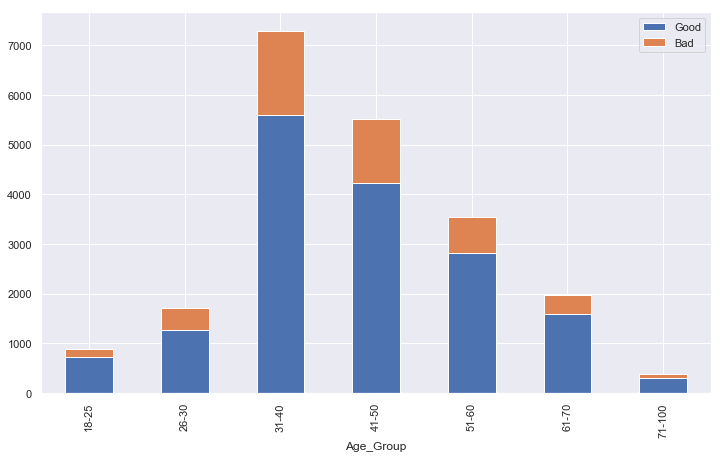

In [33]:
sns.set()
Age_List[['Age_Group', 'Good', 'Bad']].set_index('Age_Group').plot(kind = 'bar', stacked = True)
plt.show()

**We can observe from the above graph that the age groups 31-40, 41-50, 51-60 has highest number of negative reviews.**

In [34]:
data.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'Class'],
      dtype='object')

### Converting Dataset based on Recommendation_IND

In [35]:
data[(data.Class == 'Bad') & (data.Recommended_IND == 1)][['Class', 'Recommended_IND']].count()

Class              1299
Recommended_IND    1299
dtype: int64

In [36]:
Rec_List = pd.DataFrame(columns = ['Class', 'Ind1_Count', 'Ind0_Count'])
rc_list = []
for i in list([[1, 0, 'Good'], [1, 0, 'Bad']]):
    rc_list.append([i[2], data[(data.Class == i[2]) & (data.Recommended_IND == int(i[0]))]['Class'].count(),
                   data[(data.Class == i[2]) & (data.Recommended_IND == int(i[1]))]['Class'].count()])
Rec_List = Rec_List.append(pd.DataFrame(rc_list, columns = ['Class', 'Ind1_Count', 'Ind0_Count']), ignore_index = True)

In [37]:
Rec_List

,Class,Ind1_Count,Ind0_Count
0,Good,18015,193
1,Bad,1299,3979


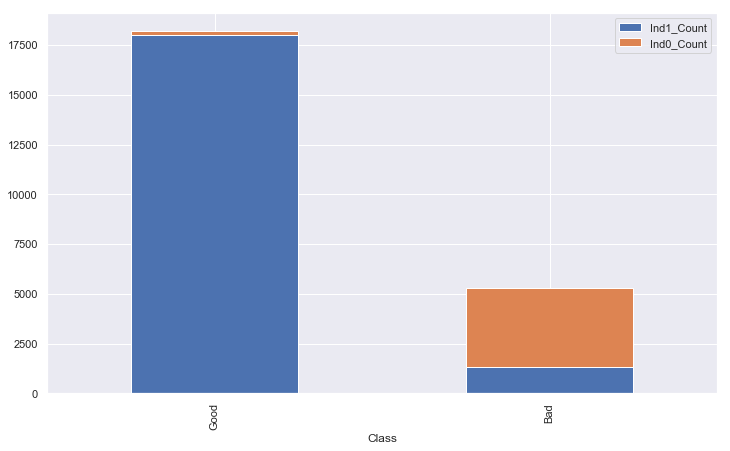

In [38]:
sns.set()
Rec_List[['Class', 'Ind1_Count', 'Ind0_Count']].set_index('Class').plot(kind = 'bar', stacked = True)
plt.show()

**From the above graph, we can observe that 
    a) when the recommendation index is 1 - it is most likely to be a good review, 
    b) when the recommendation index is 0 - it is most likely to be bad review.**

## Finding the correlation between the Input Variables

In [39]:
data.corr()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
Clothing_ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended_IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive_Feedback_Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


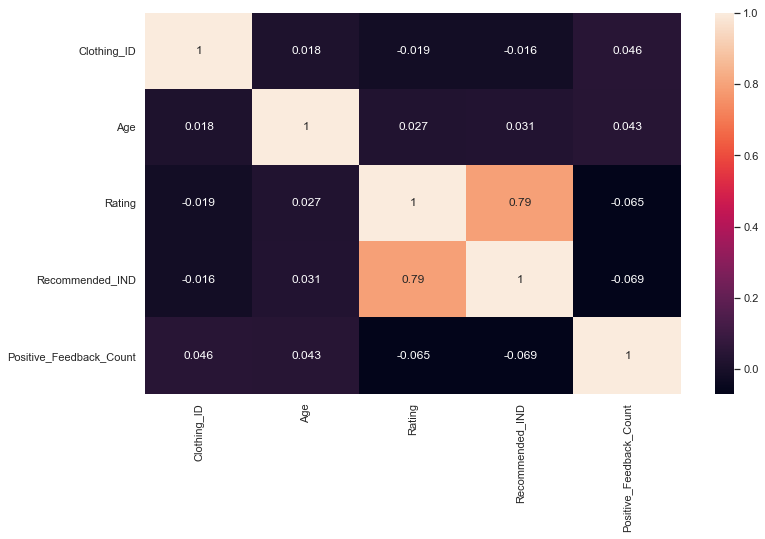

In [40]:
sns.heatmap(data.corr(), annot = True)

**From the above matrix, we can observe that Recommendation_IND has high correlation with the rating.**

### Data Cleaning and Text preprocessing

In [41]:
data_raw = data.copy()

In [42]:
# Dropping Null Values
data_raw.dropna(subset=['Review_Text'], inplace = True)

In [43]:
data_raw

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good


In [44]:
from wordcloud import WordCloud
nltk.download('wordnet')

def clean(review):
    text = review.lower()
    
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    
    # Removing words having punctuation marks
    
    words1 = []
    for word in text:
        if word not in string.punctuation:
            words1.append(word)
    words1 = ''.join(words1)
    
    # Removing words which are stopwords, numbers and words having length <= 2
    
    words2 = []
    for word in words1.split():
        word = word.lower()
        if word not in stopwords.words('english'):
            if not re.search('\d', word):
                if len(word) > 2:
                    words2.append(word)
    
    return words2
data_raw["Clean_Review"] = data_raw["Review_Text"].apply(clean)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
data_raw = data_raw[data_raw.Rating !=3]
data_raw.Sentiment = data_raw.Rating >=4

C:\Users\Vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## Analysing the Text Review

### Most Common Words

In [46]:
positive_reviews = data_raw[data_raw.Sentiment == True]
negative_reviews = data_raw[data_raw.Sentiment == False]

**Most Common Words in Positive Reviews**

In [47]:
ls1 = []
for words in list(positive_reviews['Clean_Review']):
    for word in words:
        ls1.append(word)

In [48]:
from collections import Counter
top10 = Counter(ls1).most_common()[:10]
i=1
for key, value in top10:
    print(str(i) + '. ', key, ' - ', value)
    i = i + 1

1.  dress  -  8630
2.  fit  -  8187
3.  love  -  7789
4.  size  -  7472
5.  top  -  6065
6.  wear  -  5475
7.  great  -  5417
8.  color  -  5312
9.  like  -  4950
10.  look  -  4944


['dress', 'fit', 'love', 'size', 'top', 'wear', 'great', 'color', 'like', 'look']


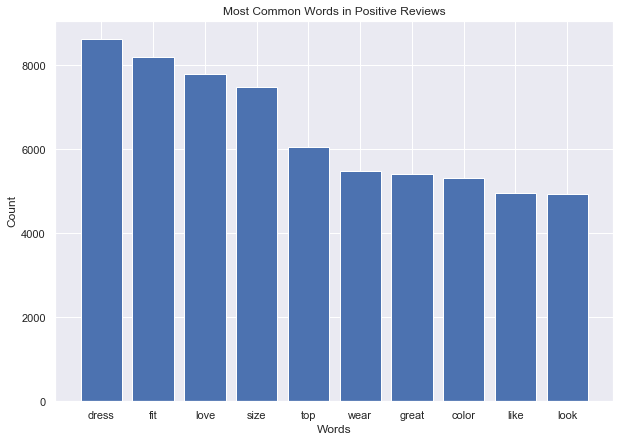

In [49]:
f, ax = plt.subplots(figsize=(10,7))
x_val = [x[0] for x in top10]
y_val = [x[1] for x in top10]

print(x_val)
plt.bar(x_val,y_val)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Positive Reviews')
plt.show()

**Most Common Words in Negative Reviews**

In [50]:
ls2 = []
for words in list(negative_reviews['Clean_Review']):
    for word in words:
        ls2.append(word)

In [51]:
from collections import Counter
top10 = Counter(ls2).most_common()[:10]
i=1
for key, value in top10:
    print(str(i) + '. ', key, ' - ', value)
    i = i + 1

1.  dress  -  1192
2.  like  -  1078
3.  look  -  911
4.  top  -  889
5.  would  -  803
6.  fit  -  770
7.  size  -  759
8.  fabric  -  726
9.  back  -  615
10.  color  -  532


['dress', 'like', 'look', 'top', 'would', 'fit', 'size', 'fabric', 'back', 'color']


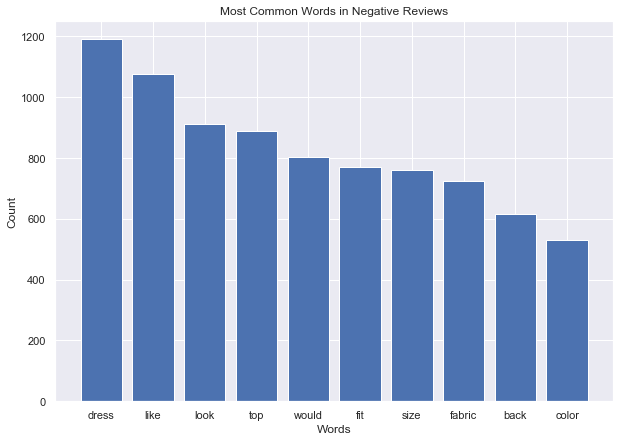

In [52]:
f, ax = plt.subplots(figsize=(10,7))
x_val = [x[0] for x in top10]
y_val = [x[1] for x in top10]

print(x_val)
plt.bar(x_val,y_val)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Negative Reviews')
plt.show()

Inferences:

    1. 'Dress' word is the most common word in both positive and negative reviews.
    2. As there are more good reviews than bad reviews, the count of each word in good reviews is more.

## 4. Developing Models

### Training and Testing

In [53]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data_raw['Review_Text'])
y = data_raw['Recommended_IND']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

### Bernoulli Naive Bayes

In [55]:
bnb = BernoulliNB() 
bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)

In [56]:
bnb_cm=confusion_matrix(y_test.values, bnb_pred)
bnb_cm

array([[ 387,  343],
       [ 197, 5019]], dtype=int64)

In [57]:
accuracy_score(y_test, bnb_pred)

0.9091826437941474

### Multinomial Naive Bayes

In [58]:
mnb = MultinomialNB() 
mnb.fit(x_train,y_train)
mnb_pred = mnb.predict(x_test)

In [59]:
mnb_cm=confusion_matrix(y_test.values, mnb_pred)
mnb_cm

array([[ 459,  271],
       [ 155, 5061]], dtype=int64)

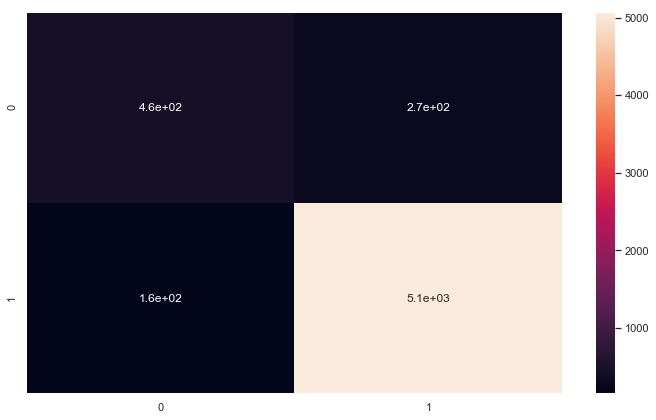

In [60]:
sns.heatmap(mnb_cm, annot = True);

In [61]:
accuracy_score(y_test, mnb_pred)

0.9283551967709385

### Logistic Regression

In [62]:
lr = LogisticRegression() 
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
lr_cm=confusion_matrix(y_test.values, lr_pred)
lr_cm

array([[ 441,  289],
       [ 159, 5057]], dtype=int64)

In [64]:
accuracy_score(y_test, lr_pred)

0.9246552304069963

### XGBoost

In [65]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [66]:
xgb_cm=confusion_matrix(y_test.values, xgb_pred)
xgb_cm

array([[ 362,  368],
       [  89, 5127]], dtype=int64)

In [67]:
accuracy_score(y_test, xgb_pred)

0.9231416078035655

### Decision Tree

In [68]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [69]:
dt_cm=confusion_matrix(y_test.values, dt_pred)
dt_cm

array([[ 288,  442],
       [ 382, 4834]], dtype=int64)

In [70]:
accuracy_score(y_test, dt_pred)

0.8614194416414396

### K-Means

In [71]:
km = KNeighborsClassifier()
km.fit(x_train,y_train)
km_pred = km.predict(x_test)

In [72]:
km_cm=confusion_matrix(y_test.values, km_pred)
km_cm

array([[  77,  653],
       [  86, 5130]], dtype=int64)

In [73]:
accuracy_score(y_test, km_pred)

0.8757147662293979

### Random Forest

In [74]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
rf_cm=confusion_matrix(y_test.values, rf_pred)
rf_cm

array([[ 146,  584],
       [  54, 5162]], dtype=int64)

In [76]:
accuracy_score(y_test, rf_pred)

0.8927009754456777

### SVM

In [77]:
svm = SGDClassifier()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

C:\Users\Vinay\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [78]:
svm_cm=confusion_matrix(y_test.values, svm_pred)
svm_cm

array([[ 308,  422],
       [  78, 5138]], dtype=int64)

In [79]:
accuracy_score(y_test, svm_pred)

0.9159098553649512

### Neural Network

In [80]:
nn = MLPClassifier()
nn.fit(x_train,y_train)
nn_pred = nn.predict(x_test)

In [81]:
nn_cm=confusion_matrix(y_test.values, nn_pred)
nn_cm

array([[ 462,  268],
       [ 185, 5031]], dtype=int64)

In [82]:
accuracy_score(y_test, nn_pred)

0.9238143289606459

## ROC Curves and AUC

In [83]:
pred_bnb = bnb.predict_proba(x_test)[:,1]
fpr_bnb,tpr_bnb,_ = roc_curve(y_test,pred_bnb)
roc_auc_bnb = auc(fpr_bnb,tpr_bnb)

pred_mnb = mnb.predict_proba(x_test)[:,1]
fpr_mnb,tpr_mnb,_ = roc_curve(y_test,pred_mnb)
roc_auc_mnb = auc(fpr_mnb,tpr_mnb)

pred_lr = lr.predict_proba(x_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_xgb = xgb.predict_proba(x_test)[:,1]
fpr_xgb,tpr_xgb,_ = roc_curve(y_test,pred_xgb)
roc_auc_xgb = auc(fpr_xgb,tpr_xgb)

pred_dt = dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

pred_km = km.predict_proba(x_test)[:,1]
fpr_km,tpr_km,_ = roc_curve(y_test,pred_km)
roc_auc_km = auc(fpr_km,tpr_km)

pred_rf = rf.predict_proba(x_test)[:,1]
fpr_rf,tpr_rf,_ = roc_curve(y_test,pred_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

pred_svm = svm.decision_function(x_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(x_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

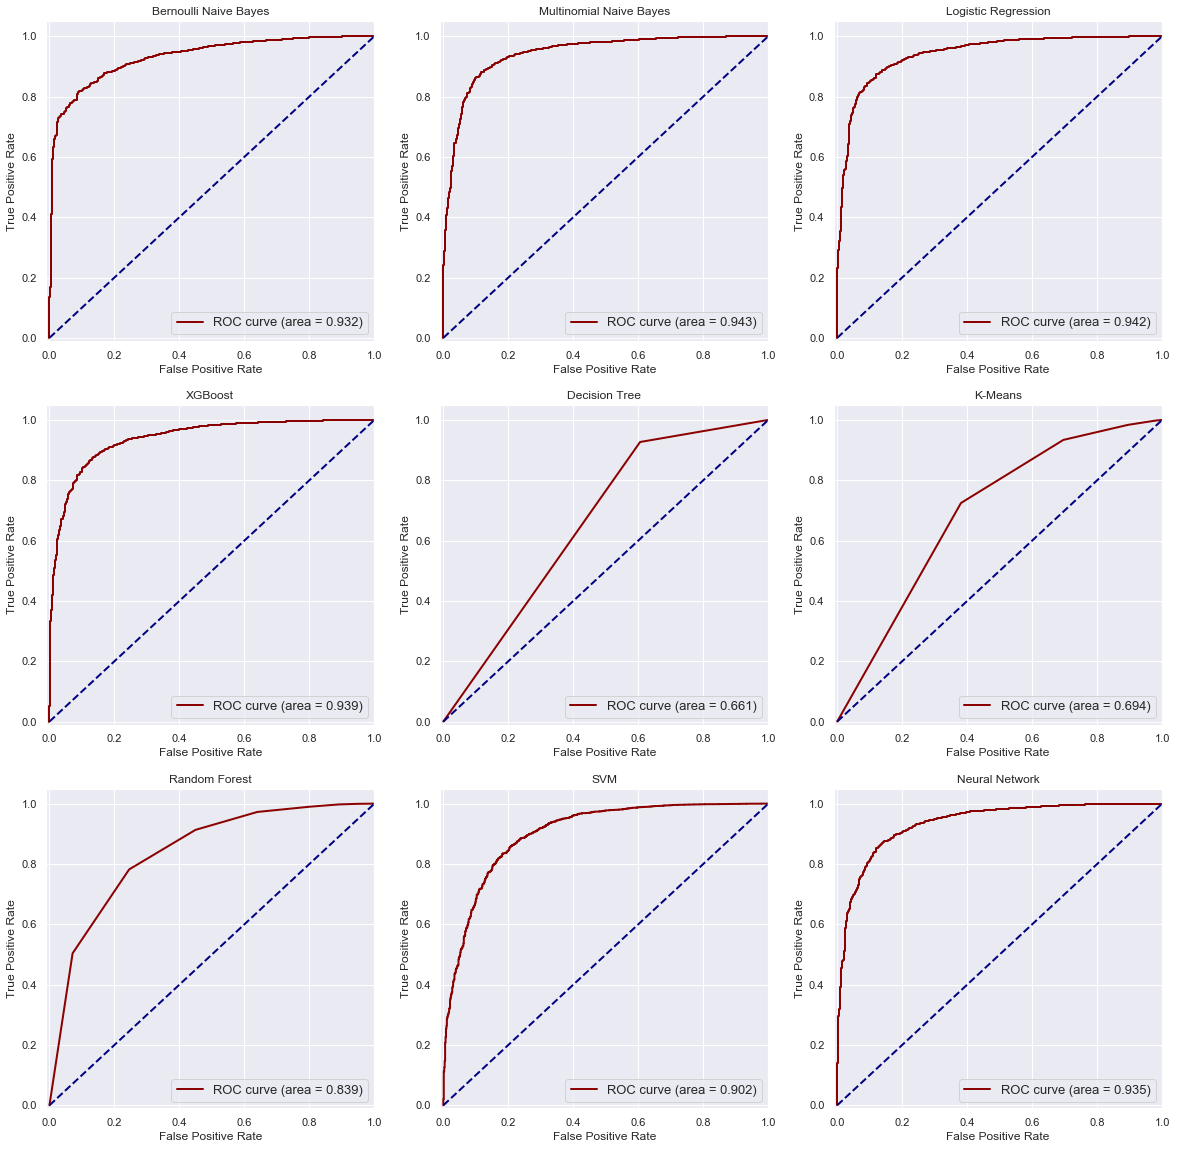

In [84]:
f, axes = plt.subplots(3, 3,figsize=(20,20))

axes[0][0].plot(fpr_bnb, tpr_bnb, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_bnb))
axes[0][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0][0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0][0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Bernoulli Naive Bayes')
axes[0][0].legend(loc='lower right', fontsize=13)

axes[0][1].plot(fpr_mnb, tpr_mnb, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_mnb))
axes[0][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0][1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0][1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Multinomial Naive Bayes')
axes[0][1].legend(loc='lower right', fontsize=13)

axes[0][2].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_lr))
axes[0][2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0][2].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0][2].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0][2].legend(loc='lower right', fontsize=13)

axes[1][0].plot(fpr_xgb, tpr_xgb, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_xgb))
axes[1][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1][0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1][0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'XGBoost')
axes[1][0].legend(loc='lower right', fontsize=13)

axes[1][1].plot(fpr_dt, tpr_dt, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_dt))
axes[1][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1][1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1][1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Decision Tree')
axes[1][1].legend(loc='lower right', fontsize=13)

axes[1][2].plot(fpr_km, tpr_km, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_km))
axes[1][2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1][2].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1][2].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'K-Means')
axes[1][2].legend(loc='lower right', fontsize=13)

axes[2][0].plot(fpr_rf, tpr_rf, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_rf))
axes[2][0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2][0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[2][0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Random Forest')
axes[2][0].legend(loc='lower right', fontsize=13)

axes[2][1].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_svm))
axes[2][1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2][1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[2][1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'SVM')
axes[2][1].legend(loc='lower right', fontsize=13)

axes[2][2].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.3f})'.format(roc_auc_nn))
axes[2][2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2][2].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[2][2].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[2][2].legend(loc='lower right', fontsize=13)

**From the above graphs, we can observe that the model of Multinomial Naive Bayes has good performance and accuracy. Because,
 the multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).**

### Inferences:

#####            1.Age is not showing much impact in choice selection.
            
#####           2.General division contributes more reviews.
            
#####           3.Sleep class has the lowest purchases.
            
#####           4.Tops department has much following in the current trend.
           
#####           5.Dresses and knits class tops the list.
           
#####           6.Dresses class need urgent care.
            
#####           7.Longue class is most recomended much,it needs to be improved.
            
#####           8.Good reviews are more (almost 63%).
            
#####            9.'Dress' word is the most common word in both positive and negative reviews.
            
#####          10.Multinomial Naive Bayes  model is best suitable for this analysis as it has good performance and accuracy.
